# TOPIC MODELING

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*_ZMgTsJGmR743ngZ7UxN9w.png">

<a href="https://statso.io/topic-modelling-case-study/" target="_blank">Data burada</a>

* Topic Modeling, metin belgelerinden gizli konuları keşfetmek için kullanılan bir Doğal Dil İşleme (NLP) tekniğidir. Bu yöntem, metinlerin konularını belirleyerek içerik ile konular arasındaki ilişkileri ortaya çıkarmaya yardımcı olur. Metin belgelerindeki konuları tanımlamak için, kelimelerin sıklığını analiz eden algoritmalar kullanılır. Bu süreç için yeterli miktarda metin verisine ihtiyaç vardır. Datamız yeterli.

In [5]:
#!pip install neattext

In [25]:
#!pip install tensorflow-hub

In [32]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import nltk
import tensorflow_hub as hub
from sklearn.decomposition import LatentDirichletAllocation
import neattext as nt
import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation # metindeki temaları bulmak için çünkü topic modelling  apacağız
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("articles.csv", encoding='latin1')

In [10]:
df.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [16]:
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = nfx.remove_punctuations(text)
    text = nfx.remove_stopwords(text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Kelimeleri kök haline getir
    preprocessed_text = ' '.join(tokens)  # Kelimeleri birleştir
    return preprocessed_text

df['Article'] = df['Article'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# TensorFlow'un Hub kütüphanesini kullanacağım,

In [42]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Article'])
n_components = 5 # 5 konu seçtim
lda = LatentDirichletAllocation(n_components=n_components, random_state=42) # modeli oluştur
lda.fit(x) # eğit
topic_modelling = lda.transform(x) # uygula
topic_labels = np.argmax(topic_modelling, axis=1)
df['topic_labels'] = topic_labels # dfye label sutunu ekle oraya ata

In [40]:
df.head()

,Article,Title,topic_labels
0,Data analysis process inspecting exploring dat...,Best Books to Learn Data Analysis,1
1,performance machine learning algorithm particu...,Assumptions of Machine Learning Algorithms,3
2,seen news divided category news website popula...,News Classification with Machine Learning,4
3,class classification problem problem binary cl...,Multiclass Classification Algorithms in Machin...,4
4,Multinomial Naive Bayes variant Naive Bayes al...,Multinomial Naive Bayes in Machine Learning,0


In [45]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Article'])
n_components = 10 # 10 konu seçtim
lda = LatentDirichletAllocation(n_components=n_components, random_state=42) # modeli oluştur
lda.fit(x) # eğit
topic_modelling = lda.transform(x) # uygula
topic_labels = np.argmax(topic_modelling, axis=1)
df['topic_labels'] = topic_labels # dfye label sutunu ekle oraya ata

<Axes: xlabel='topic_labels', ylabel='count'>

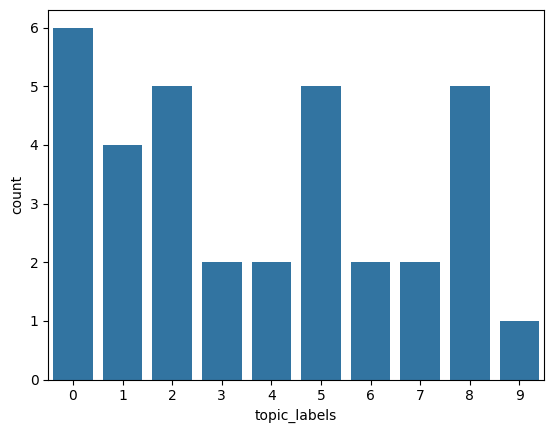

In [46]:
sns.countplot(x=df['topic_labels'])

In [43]:
# modelimiz articles 10 etikel verdi, acaba bu etikelterin iÇeriği ne? hangi konular var etiketlerde, ona bakalım.

In [47]:
# Konu kelimelerini alma
n_words = 7  # Her konu için görüntülemek istediğiniz kelime sayısı
feature_names = vectorizer.get_feature_names_out()

for index, topic in enumerate(lda.components_):
    print(f"\nKonu {index + 1}:")
    # Kelimeleri al ve sıralama yap
    top_words_indices = topic.argsort()[-n_words:][::-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print("En yüksek kelimeler:", top_words)


Konu 1:
En yüksek kelimeler: ['language', 'learning', 'classification', 'nlp', 'insurance', 'machine', 'health']

Konu 2:
En yüksek kelimeler: ['clustering', 'computer', 'dbscan', 'vision', 'system', 'agglomerative', 'cluster']

Konu 3:
En yüksek kelimeler: ['sentiment', 'scatter', 'plot', 'tata', 'instagram', 'people', 'squid']

Konu 4:
En yüksek kelimeler: ['item', 'clustering', 'birch', 'swap', 'list', 'python', 'position']

Konu 5:
En yüksek kelimeler: ['algorithm', 'shift', 'case', 'mean', 'clustering', 'machine', 'use']

Konu 6:
En yüksek kelimeler: ['clustering', 'algorithm', 'learning', 'stock', 'deep', 'multinomial', 'dictionary']

Konu 7:
En yüksek kelimeler: ['voice', 'recorder', 'data', 'analysis', 'decision', 'book', 'today']

Konu 8:
En yüksek kelimeler: ['multilayer', 'perceptron', 'api', 'framework', 'apis', 'propagation', 'neural']

Konu 9:
En yüksek kelimeler: ['news', 'learning', 'category', 'machine', 'assumption', 'deep', 'algorithm']

Konu 10:
En yüksek kelimeler